In [37]:
import numpy as np 
import pandas as pd 
import os

path="/kaggle/input/pizza-steak-image-classification-dataset"

for dirpath, dirnames, filenames in os.walk("/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak'.
There are 2 directories and 0 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test'.
There are 0 directories and 250 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test/steak'.
There are 0 directories and 250 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test/pizza'.
There are 2 directories and 0 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train'.
There are 0 directories and 750 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train/steak'.
There are 0 directories and 750 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train/pizza'.


In [38]:
import pathlib

# Get the class names
data_dir = pathlib.Path("/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Image shape: (512, 512, 3)


(512, 512, 3)

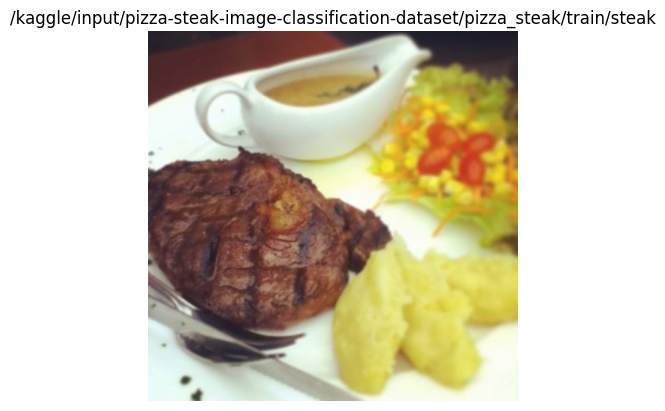

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = os.path.join(target_dir, target_class)

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# View a random image from the training dataset
img = view_random_image(target_dir="/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train",
                        target_class="/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train/steak")

# View the img (actually just a big array/tensor)
img

# View the image shape
img.shape

In [40]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.15294118, 0.12156863, 0.17254902],
        [0.15294118, 0.12156863, 0.17254902],
        [0.15686275, 0.1254902 , 0.17647059],
        ...,
        [0.11764706, 0.09411765, 0.14901961],
        [0.11764706, 0.09411765, 0.14901961],
        [0.12156863, 0.09803922, 0.15294118]],

       [[0.15294118, 0.12156863, 0.17254902],
        [0.15294118, 0.12156863, 0.17254902],
        [0.15686275, 0.1254902 , 0.17647059],
        ...,
        [0.11764706, 0.09411765, 0.14901961],
        [0.12156863, 0.09803922, 0.15294118],
        [0.12156863, 0.09803922, 0.15294118]],

       [[0.15294118, 0.12156863, 0.17254902],
        [0.15294118, 0.12156863, 0.17254902],
        [0.15294118, 0.12156863, 0.17254902],
        ...,
        [0.12156863, 0.09803922, 0.15294118],
        [0.12156863, 0.09803922, 0.15294118],
        [0.12156863, 0.09803922, 0.15294118]],

       ...,

       [[0.90980392, 0.98431373, 0.97647059],
        [0.90980392, 0.98431373, 0.97647059],
        [0.90980392, 0

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train"
test_dir = "/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model 
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 40s 841ms/step - loss: 0.5318 - accuracy: 0.7300 - val_loss: 0.4147 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 39s 828ms/step - loss: 0.4205 - accuracy: 0.8273 - val_loss: 0.3691 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 39s 824ms/step - loss: 0.3714 - accuracy: 0.8433 - val_loss: 0.3446 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 39s 824ms/step - loss: 0.3533 - accuracy: 0.8507 - val_loss: 0.3521 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 39s 825ms/step - loss: 0.2933 - accuracy: 0.8840 - val_loss: 0.3474 - val_accuracy: 0.8540


In [42]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [43]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) 

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) 

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Non-augmented training images:
Found 1500 images belonging to 2 classes.
Augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [71]:
from tensorflow.keras.layers import Dropout

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, 
                           kernel_size=3,
                           activation="relu", 
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    
    # Add another dropout layer after the second convolutional layer
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate as needed
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 43s 881ms/step - loss: 0.6502 - accuracy: 0.6120 - val_loss: 0.5418 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 42s 895ms/step - loss: 0.5278 - accuracy: 0.7373 - val_loss: 0.3789 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 41s 870ms/step - loss: 0.4948 - accuracy: 0.7593 - val_loss: 0.3645 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 41s 872ms/step - loss: 0.4827 - accuracy: 0.7720 - val_loss: 0.3348 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 41s 875ms/step - loss: 0.4697 - accuracy: 0.7880 - val_loss: 0.3307 - val_accuracy: 0.8740


In [72]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

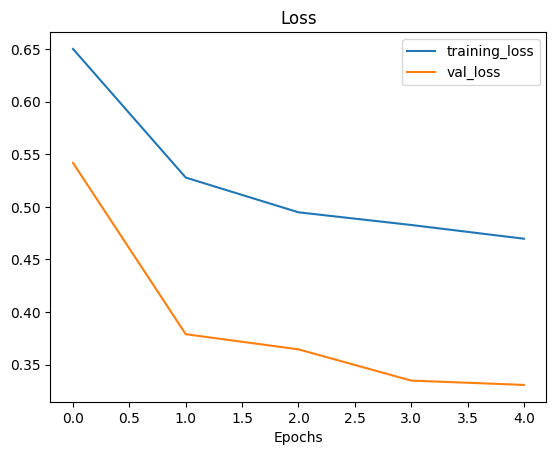

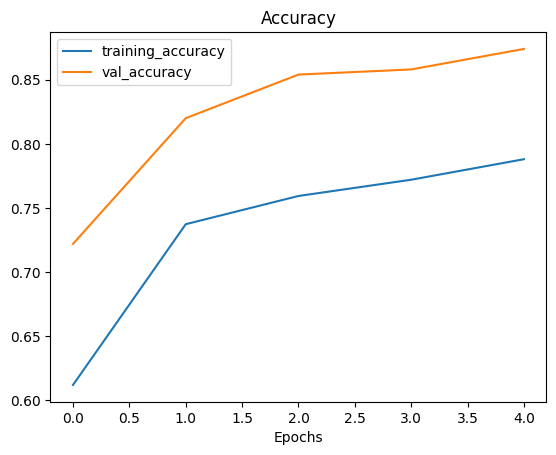

In [73]:
# Check out the TinyVGG model performance
plot_loss_curves(history_2)

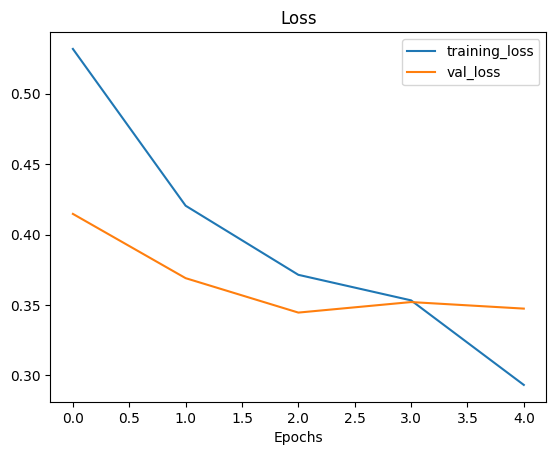

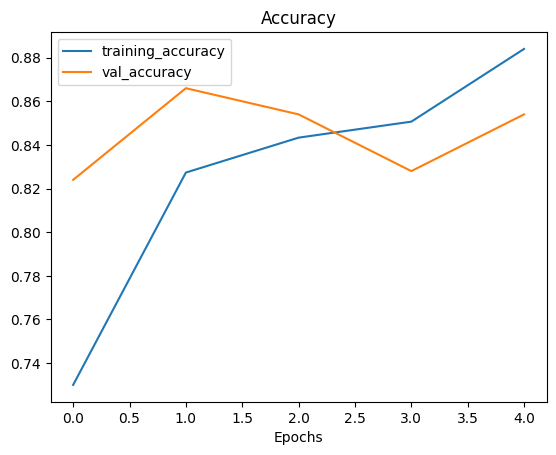

In [74]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

1/1 [==============================] - 0s 28ms/step
['pizza' 'steak']
Prediction: Pizza


Text(0.5, 1.0, 'Prediction: [[0.19862989]]')

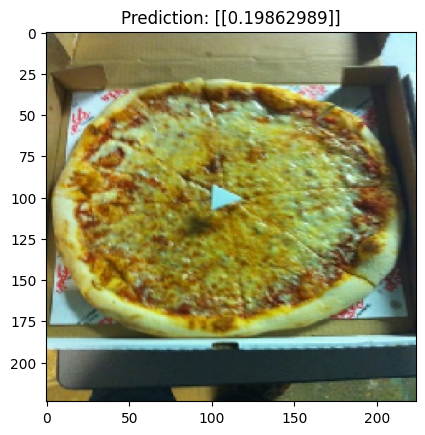

In [86]:
# Making a prediction with our trained model

from tensorflow.keras.preprocessing import image

# Load and preprocess the new image
img_path = "/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test/pizza/106507.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make predictions
predictions = model_2.predict(img_array)

print(class_names)

# Display the results
if predictions[0][0] > 0.5:
    print("Prediction: Steak")
else:
    print("Prediction: Pizza")
    
    
plt.imshow(img)
plt.title(f"Prediction: {predictions}")